## Requirements and ata loading

In [ ]:
!pip install nltk
!pip install numpy
!pip install pandas
!pip install textblob
!pip install scikit-learn
!pip install IPython
!pip install matplotlib
!pip install seaborn

In [1]:
import re
import nltk
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta
from textblob import TextBlob 
from multiprocessing import Pool
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from IPython.display import display, HTML

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/jgonzalez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/jgonzalez/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jgonzalez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jgonzalez/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
df = pd.read_csv('data/dataset.csv')
df = df.rename(columns={'Review': 'review', 'Rating': 'rating'})

In [3]:
df.head(5)

,review,rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


## Data pre processing tasks

In [9]:
def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Basic spell correction using TextBlob
    text = str(TextBlob(text).correct())
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back to text
    return ' '.join(tokens)

def parallel_preprocess(texts, n_cores=6):
    total = len(texts)
    processed_texts = []
    
    print(f"Starting processing of {total} texts...")
    start_time = time.time()
    last_batch_time = start_time
    
    with Pool(n_cores) as pool:
        for i, result in enumerate(pool.imap(preprocess_text, texts)):
            processed_texts.append(result)
            if (i + 1) % 10 == 0:
                current_time = time.time()
                batch_time = current_time - last_batch_time
                total_time = current_time - start_time
                
                print(f"Processed {i + 1}/{total} texts ({((i + 1)/total)*100:.1f}%)")
                print(f"Batch time: {timedelta(seconds=batch_time)} - Total time so far: {timedelta(seconds=total_time)}")                                
                last_batch_time = current_time
    
    total_execution_time = time.time() - start_time
    print(f"Processing completed!")
    print(f"Total execution time: {timedelta(seconds=total_execution_time)}")
    return processed_texts

In [10]:
df['review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [11]:
preprocess_text(df['review'][0])

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud banks doors opening closing hear people talking halfway maybe noisy neighbors area bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night'

In [12]:
df['review'][2]

"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 6

In [13]:
preprocess_text(df['review'][2])

'nice rooms experience hotel monarch seattle good hotel levelpositives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wake calls converge busy hard touch provide guidance special requests hard use upon sound dock suite non sanctioning decided book mediterranean suite night weekend stay st choice rest party filled comparison w spent night larger square forage room great soaking tub whirlpool jets nice showerbefore stay hotel arrange car service price tip reasonable driver waiting arrivalcheckin easy downside room picked person jacuzi tub bath accessories salts bubble bath stay night got checked voucher bottle champagne nice gesture fish waiting room impression room huge open space felt room big far away bed chose change channel upon dock broken disappointing morning way asked desk check thermostat said f degrees warm try cover face night bright blue light kept got room night st 

In [14]:
# 3. Apply preprocessing
n_samples = 100
df_subset = df.sample(n=n_samples, random_state=42)
df_subset['cleaned_review'] = parallel_preprocess(df_subset['review'])
print("Original shape:", df.shape)
print("Subset shape:", df_subset.shape)

Starting processing of 100 texts...
Processed 10/100 texts (10.0%)
Batch time: 0:00:18.351620 - Total time so far: 0:00:18.351620
Processed 20/100 texts (20.0%)
Batch time: 0:00:00.001047 - Total time so far: 0:00:18.352667
Processed 30/100 texts (30.0%)
Batch time: 0:00:00.000056 - Total time so far: 0:00:18.352723
Processed 40/100 texts (40.0%)
Batch time: 0:00:20.733836 - Total time so far: 0:00:39.086559
Processed 50/100 texts (50.0%)
Batch time: 0:00:00.000415 - Total time so far: 0:00:39.086973
Processed 60/100 texts (60.0%)
Batch time: 0:00:13.459672 - Total time so far: 0:00:52.546645
Processed 70/100 texts (70.0%)
Batch time: 0:00:10.332699 - Total time so far: 0:01:02.879344
Processed 80/100 texts (80.0%)
Batch time: 0:00:02.193094 - Total time so far: 0:01:05.072438
Processed 90/100 texts (90.0%)
Batch time: 0:00:07.431961 - Total time so far: 0:01:12.504399
Processed 100/100 texts (100.0%)
Batch time: 0:00:00.000079 - Total time so far: 0:01:12.504478
Processing completed!


In [18]:
#df_subset.to_csv('data/cleaned_dataset.csv', index=False)
df_new = pd.read_csv('data/cleaned_dataset.csv')
df_new.head(5)

,review,rating,cleaned_review
0,not recommend hotel did reviewers actually sta...,1,recommend hotel reviews actually stay hotel go...
1,"barcelona rocks, stayed hotel jazz girlfriend ...",4,barcelona rocks stayed hotel jazz girlfriend n...
2,ok hotel good location stayed night way beijin...,3,ok hotel good location stayed night way raw is...
3,great service nice pool ok beach lovely ground...,4,great service nice pool ok beach lovely ground...
4,surprising treat spent weekend july 15/16 2006...,5,surprising treat spent weekend july cartwright...


In [20]:
#df['cleaned_review'] = parallel_preprocess(df['review'])

In [21]:
#df.to_csv('data/cleaned_dataset_full.csv', index=False)

In [22]:
df.head(5)

,review,rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [24]:
# 1. Simple side-by-side comparison
def show_comparison(original, cleaned, n_samples=5):
    comparison_df = pd.DataFrame({
        'Original Text': original,
        'Cleaned Text': cleaned
    })
    
    # Show random samples
    display(comparison_df.sample(n=n_samples))

# 2. Highlighting differences
def highlight_differences(text1, text2):
    """Highlight words that are different"""
    words1 = set(text1.split())
    words2 = set(text2.split())
    
    different_words = words1.symmetric_difference(words2)
    
    html = f"""
    <div style="display: flex; gap: 20px;">
        <div style="flex: 1;">
            <h4>Original:</h4>
            <p>{''.join([f'<span style="background-color: orange">{w}</span> ' if w in different_words else f'{w} ' for w in text1.split()])}</p>
        </div>
        <div style="flex: 1;">
            <h4>Cleaned:</h4>
            <p>{''.join([f'<span style="background-color: orange">{w}</span> ' if w in different_words else f'{w} ' for w in text2.split()])}</p>
        </div>
    </div>
    """
    return HTML(html)

In [25]:
dataset = pd.read_csv('data/cleaned_dataset_full.csv')
dataset.head(5)

,review,rating,cleaned_review
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms experience hotel monarch seattle go...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monarch...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


In [28]:
highlight_differences(dataset['review'][25], dataset['cleaned_review'][25])

/tmp/ipykernel_47734/3261219635.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='rating', ax=ax1, palette='viridis')


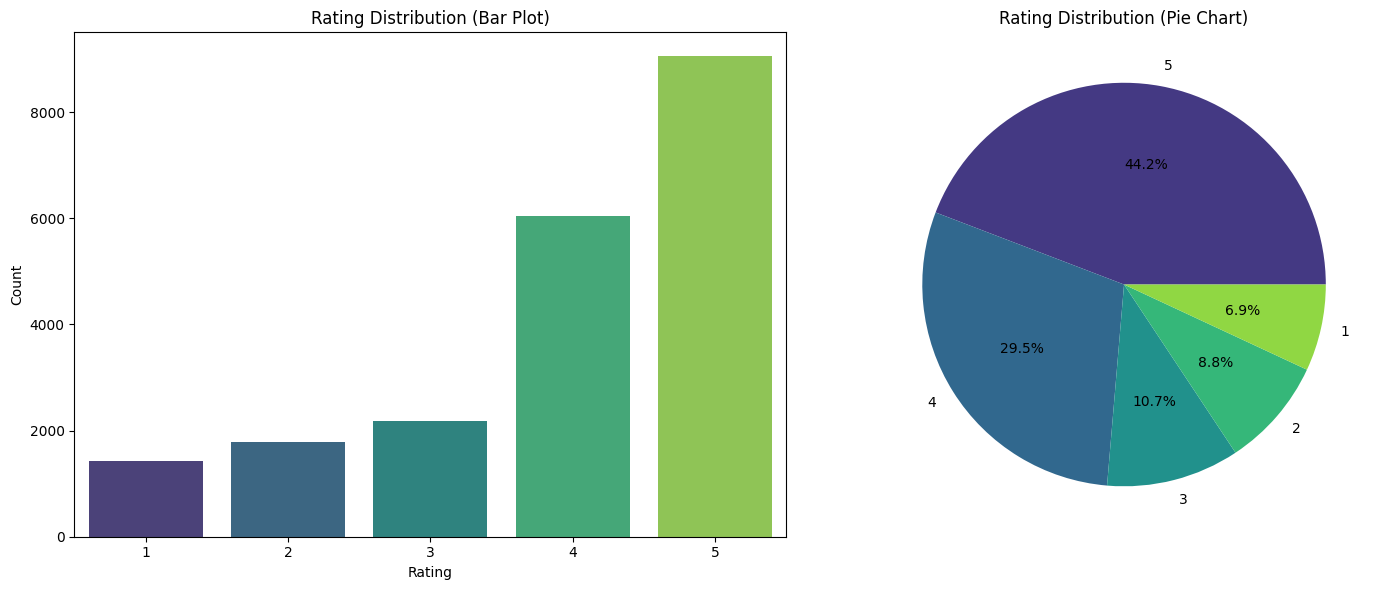


Numerical Summary:
rating
1    1421
2    1793
3    2184
4    6039
5    9054
Name: count, dtype: int64

Percentage Distribution:
rating
1     6.9
2     8.8
3    10.7
4    29.5
5    44.2
Name: proportion, dtype: float64


In [29]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Bar plot with seaborn
sns.countplot(data=dataset, x='rating', ax=ax1, palette='viridis')
ax1.set_title('Rating Distribution (Bar Plot)')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Count')

# 2. Pie chart with matplotlib
rating_counts = dataset['rating'].value_counts()
colors = sns.color_palette('viridis', n_colors=len(rating_counts))
ax2.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=colors)
ax2.set_title('Rating Distribution (Pie Chart)')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print numerical summary
print("\nNumerical Summary:")
print(dataset['rating'].value_counts().sort_index())
print("\nPercentage Distribution:")
print(dataset['rating'].value_counts(normalize=True).sort_index().mul(100).round(1))

## Logistic regression training and analysis

### TFIDf versus Bag of Words

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Split data (add balance classes later on)
X_train, X_test, y_train, y_test = train_test_split(
    dataset['cleaned_review'],
    dataset['rating'],
    test_size=0.2,
    random_state=42,
    stratify=df['rating']
)

# Create pipelines for both vectorizers
pipeline_count = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression(max_iter=500))
])

pipeline_tfidf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression(max_iter=500))
])

# Define parameter grid
param_grid = {
    'vectorizer__max_features': [2000], # [1500, 2000, 2200],
    'vectorizer__min_df': [10, 12], # [5, 10, 12],
    'vectorizer__max_df': [0.9], # [0.9, 0.95, 0.99],
    'vectorizer__ngram_range': [(1, 2)], # [(1, 1), (1, 2)],
    'classifier__C': [0.1, 1.0] # [0.1, 1.0, 10.0]
}

# Function to perform grid search
def optimize_pipeline(pipeline, param_grid, X_train, y_train):
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=6,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)
    
    return grid_search.best_estimator_, grid_search

In [50]:
# Optimize both pipelines
best_count_model, grid_search_count = optimize_pipeline(pipeline_count, param_grid, X_train, y_train)
best_tfidf_model, grid_search_tfidf = optimize_pipeline(pipeline_tfidf, param_grid, X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'classifier__C': 0.1, 'vectorizer__max_df': 0.9, 'vectorizer__max_features': 2000, 'vectorizer__min_df': 12, 'vectorizer__ngram_range': (1, 2)}
Best cross-validation score: 0.5992556213566056
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'classifier__C': 1.0, 'vectorizer__max_df': 0.9, 'vectorizer__max_features': 2000, 'vectorizer__min_df': 10, 'vectorizer__ngram_range': (1, 2)}
Best cross-validation score: 0.6133479622669525


#### TF IDF
Best parameters: {'classifier__C': 1.0, 'vectorizer__max_df': 0.9, 'vectorizer__max_features': 2200, 'vectorizer__min_df': 10, 'vectorizer__ngram_range': (1, 2)}
Best cross-validation score: 0.614690225539007
#### Count Vectorizer
Best parameters: {'classifier__C': 0.1, 'vectorizer__max_df': 0.9, 'vectorizer__max_features': 2000, 'vectorizer__min_df': 12, 'vectorizer__ngram_range': (1, 2)}
Best cross-validation score: 0.5992556213566056
Fitting 5 folds for each of 162 candidates, totalling 810 fits

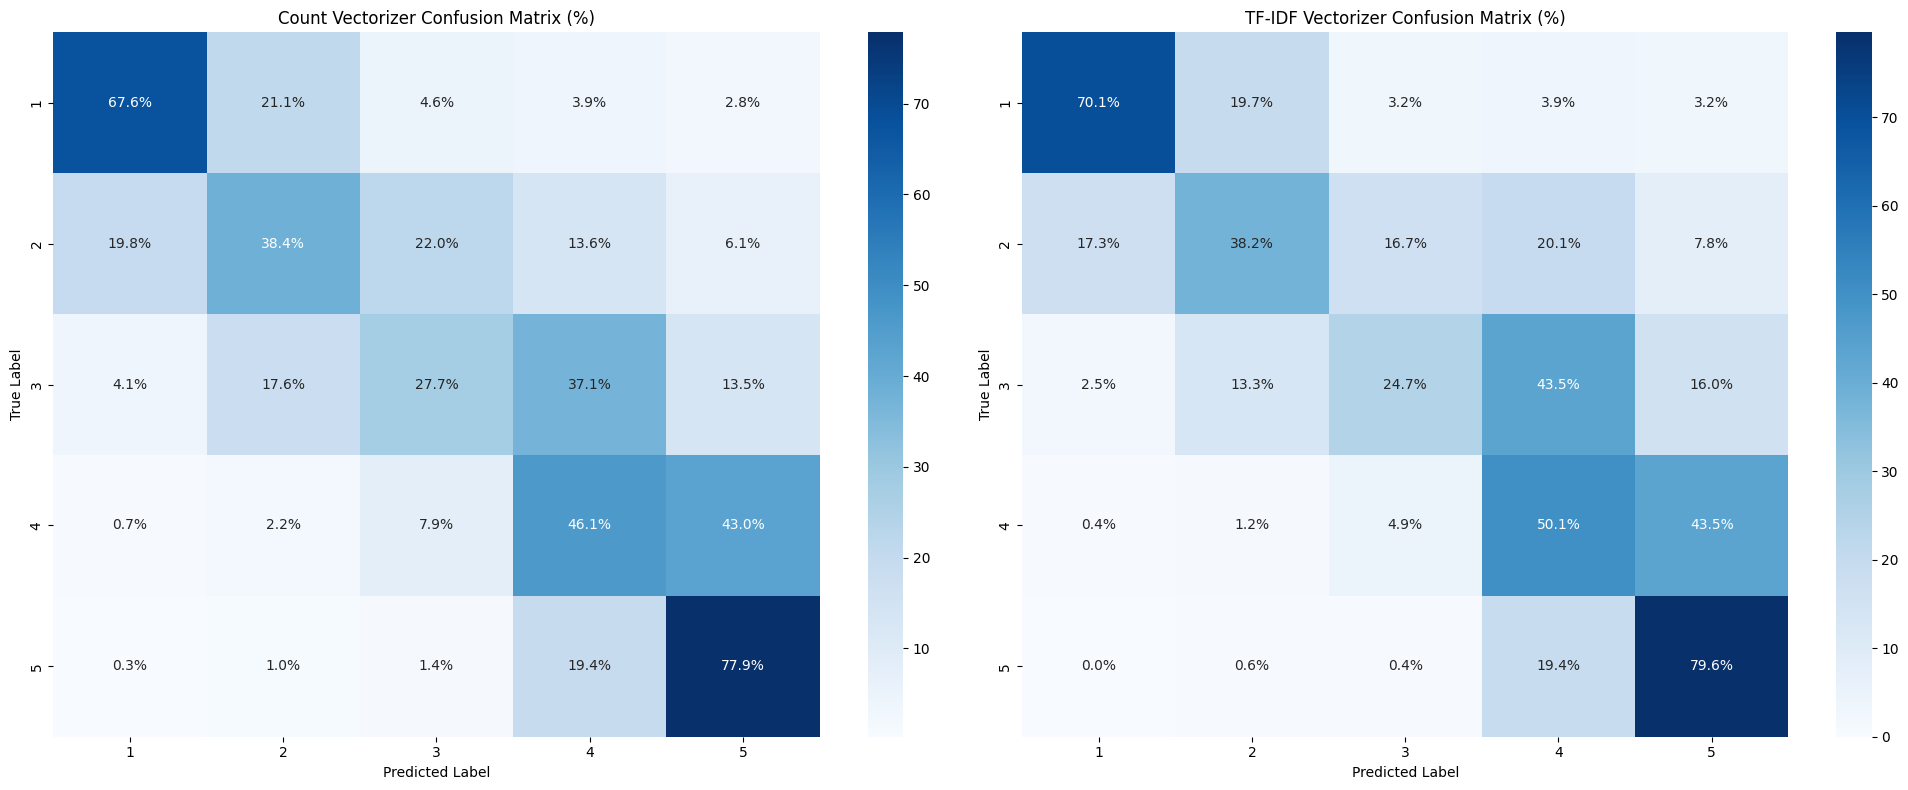


Count Vectorizer Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.68      0.66       284
           2       0.43      0.38      0.41       359
           3       0.36      0.28      0.31       437
           4       0.49      0.46      0.48      1208
           5       0.70      0.78      0.74      1811

    accuracy                           0.59      4099
   macro avg       0.53      0.52      0.52      4099
weighted avg       0.58      0.59      0.58      4099


TF-IDF Vectorizer Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.70      0.71       284
           2       0.50      0.38      0.43       359
           3       0.44      0.25      0.32       437
           4       0.49      0.50      0.50      1208
           5       0.70      0.80      0.74      1811

    accuracy                           0.61      4099
   macro avg       0.57      0.53      0.54     

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, title):
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Convert to percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Create figure
    plt.figure(figsize=(10, 8))
    
    # Plot heatmap
    sns.heatmap(cm_percentage, 
                annot=True, 
                fmt='.1f', # Show one decimal place
                cmap='Blues',
                xticklabels=sorted(set(y_true)),
                yticklabels=sorted(set(y_true)))
    
    # Add labels and title
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Add percentage sign to annotations
    for t in plt.gca().texts:
        t.set_text(t.get_text() + '%')

def compare_models(model1, model2, X_test, y_test):
    # Make predictions
    y_pred_count = model1.predict(X_test)
    y_pred_tfidf = model2.predict(X_test)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # First confusion matrix
    plt.sca(ax1)
    cm1 = confusion_matrix(y_test, y_pred_count)
    cm1_percentage = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis] * 100
    sns.heatmap(cm1_percentage, 
                annot=True, 
                fmt='.1f',
                cmap='Blues',
                xticklabels=sorted(set(y_test)),
                yticklabels=sorted(set(y_test)),
                ax=ax1)
    ax1.set_title('Count Vectorizer Confusion Matrix (%)')
    ax1.set_ylabel('True Label')
    ax1.set_xlabel('Predicted Label')
    
    # Add percentage sign to annotations in first matrix
    for t in ax1.texts:
        t.set_text(t.get_text() + '%')
    
    # Second confusion matrix
    plt.sca(ax2)
    cm2 = confusion_matrix(y_test, y_pred_tfidf)
    cm2_percentage = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis] * 100
    sns.heatmap(cm2_percentage, 
                annot=True, 
                fmt='.1f',
                cmap='Blues',
                xticklabels=sorted(set(y_test)),
                yticklabels=sorted(set(y_test)),
                ax=ax2)
    ax2.set_title('TF-IDF Vectorizer Confusion Matrix (%)')
    ax2.set_ylabel('True Label')
    ax2.set_xlabel('Predicted Label')
    
    # Add percentage sign to annotations in second matrix
    for t in ax2.texts:
        t.set_text(t.get_text() + '%')
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    # Print classification reports
    print("\nCount Vectorizer Classification Report:")
    print(classification_report(y_test, y_pred_count))
    
    print("\nTF-IDF Vectorizer Classification Report:")
    print(classification_report(y_test, y_pred_tfidf))

# Compare the models
compare_models(best_count_model, best_tfidf_model, X_test, y_test)

In [56]:
def plot_param_importance(grid_search_cv, title="Parameter Importance"):
    """
    Plot parameter importance from GridSearchCV results
    
    Args:
        grid_search_cv: Fitted GridSearchCV object
        title: Title for the overall plot
    """
    # Get results from GridSearchCV
    results = pd.DataFrame(grid_search_cv.cv_results_)
    
    # Calculate mean score for each parameter
    param_scores = {}
    
    for param in grid_search_cv.param_grid.keys():
        param_values = results[f'param_{param}'].unique()
        
        # Convert param_values to strings if they're tuples (like ngram_range)
        if isinstance(param_values[0], tuple):
            x_values = range(len(param_values))
            x_labels = [str(v) for v in param_values]
        else:
            x_values = [float(v) if isinstance(v, (int, float)) else v for v in param_values]
            x_labels = x_values

        mean_scores = [
            results[results[f'param_{param}'] == value]['mean_test_score'].mean()
            for value in param_values
        ]
        param_scores[param] = (x_values, mean_scores, x_labels)
    
    # Plot
    plt.figure(figsize=(15, 10))
    n_params = len(param_scores)
    n_cols = 2
    n_rows = (n_params + 1) // 2
    
    for i, (param, (x_values, scores, x_labels)) in enumerate(param_scores.items()):
        plt.subplot(n_rows, n_cols, i+1)
        
        # Plot
        plt.plot(x_values, scores, 'o-', linewidth=2, markersize=8)
        
        # Clean parameter name for display
        param_name = param.split('__')[-1]
        plt.title(f'Impact of {param_name}', fontsize=12, pad=10)
        plt.xlabel('Parameter value', fontsize=10)
        plt.ylabel('Mean CV score', fontsize=10)
        
        # Set x-ticks
        plt.xticks(x_values, x_labels, rotation=45 if isinstance(x_labels[0], str) else 0)
        
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Add value labels
        for x, y in zip(x_values, scores):
            plt.annotate(f'{y:.3f}', 
                        (x, y), 
                        textcoords="offset points", 
                        xytext=(0,10), 
                        ha='center')
    
    plt.suptitle(title, fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

Count Vectorizer Parameter Importance:


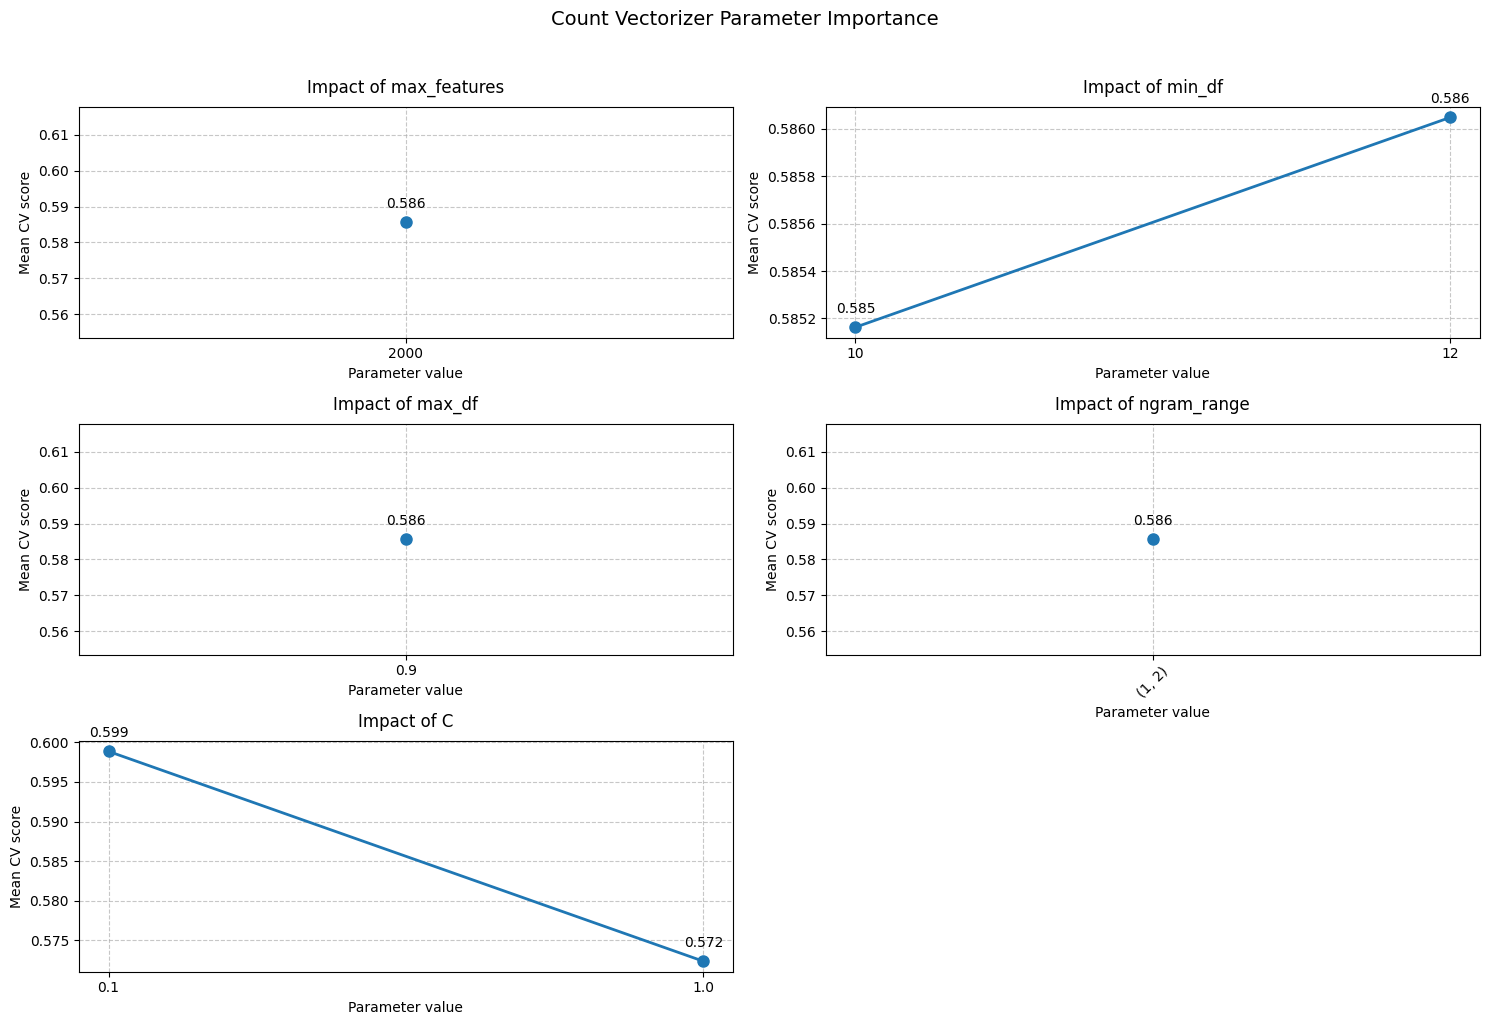


TF-IDF Vectorizer Parameter Importance:


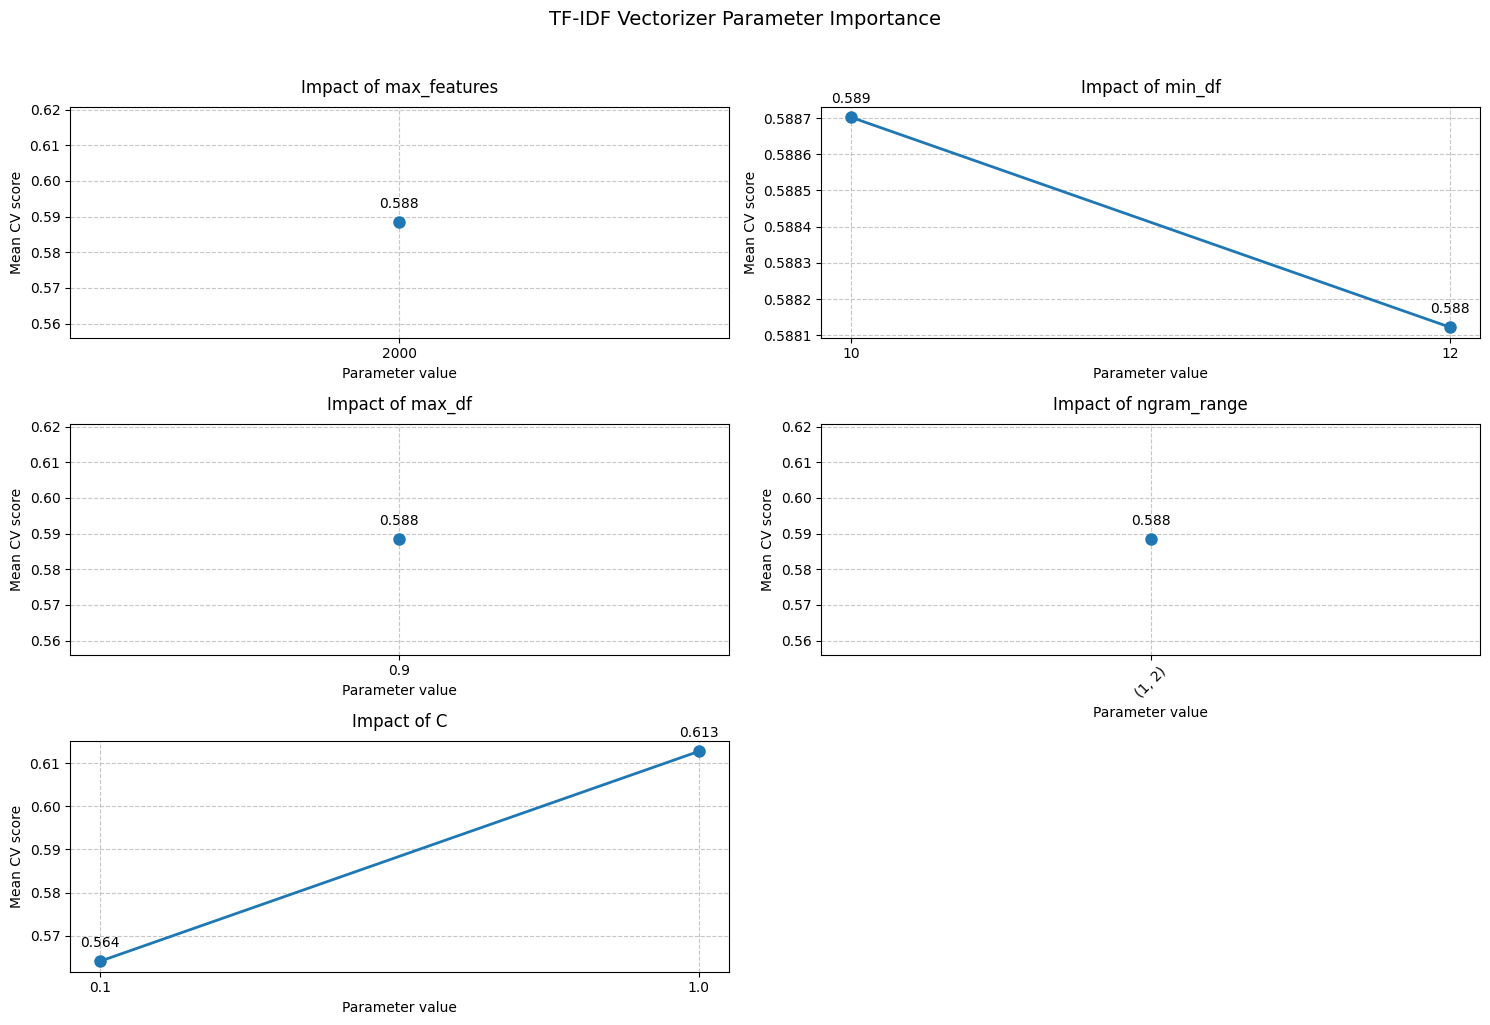

In [57]:
# Plot parameter importance for both models
print("Count Vectorizer Parameter Importance:")
plot_param_importance(grid_search_count, "Count Vectorizer Parameter Importance")

print("\nTF-IDF Vectorizer Parameter Importance:")
plot_param_importance(grid_search_tfidf, "TF-IDF Vectorizer Parameter Importance")


### PCA

Key points to consider:
1. Use TruncatedSVD instead of PCA for sparse matrices
2. Monitor the explained variance ratio to choose the optimal number of components
3. Consider the trade-off between dimensionality reduction and information loss
4. Compare computational performance (time and memory) with and without PCA

In [72]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.pipeline import Pipeline

# Note: For sparse matrices (which TF-IDF produces), we should use TruncatedSVD 
# instead of PCA as it's more efficient and doesn't require densifying the matrix

# Create pipeline with dimensionality reduction
pipeline_with_pca = Pipeline([
    ('vectorizer', TfidfVectorizer(
        max_features=3000,
        min_df=10,
        max_df=0.9,
        ngram_range=(1, 2),
    )),
    ('dim_reduction', TruncatedSVD(
        n_components=2000,  # You can tune this parameter
        random_state=42
    )),
    ('classifier', LogisticRegression(
       max_iter=800
    ))
])

# Parameters for pipeline with PCA
param_grid_with_pca = {
    'vectorizer__max_features': [2500, 2700],
    'vectorizer__min_df': [10],
    'vectorizer__max_df': [0.9, 0.95],
    'dim_reduction__n_components': [2000, 1500],
    'classifier__C': [0.1, 1.0]
}

# Parameters for pipeline without PCA
param_grid_without_pca = {
    'vectorizer__max_features': [2500, 2700],
    'vectorizer__min_df': [10],
    'vectorizer__max_df': [0.9, 0.95],
    'classifier__C': [0.1, 1.0]
}

# Optimize pipeline
def optimize_pipeline_with_pca(X_train, y_train):
    grid_search = GridSearchCV(
        pipeline_with_pca,
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=6,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)
    
    return grid_search.best_estimator_

# Train model and analyze variance explained
def analyze_variance_explained(model, X_train):
    # Get the TruncatedSVD step
    svd = model.named_steps['dim_reduction']
    
    # Calculate cumulative variance explained
    cumulative_variance_ratio = np.cumsum(svd.explained_variance_ratio_)
    
    # Plot variance explained
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), 
            cumulative_variance_ratio, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Explained Variance vs Number of Components')
    plt.grid(True)
    plt.show()
    
    # Print total variance explained
    print(f"Total variance explained: {cumulative_variance_ratio[-1]:.4f}")

# Compare models with and without dimensionality reduction
def compare_models_with_without_pca(X_train, X_test, y_train, y_test):
    # Train models
    grid_with_pca = GridSearchCV(
        pipeline_with_pca,
        param_grid_with_pca,
        cv=5,
        scoring='accuracy',
        n_jobs=6,
        verbose=1
    )
    grid_with_pca.fit(X_train, y_train)
    model_with_pca = grid_with_pca.best_estimator_
    
    grid_without_pca = GridSearchCV(
        pipeline_tfidf,
        param_grid_without_pca,
        cv=5,
        scoring='accuracy',
        n_jobs=6,
        verbose=1
    )
    grid_without_pca.fit(X_train, y_train)
    model_without_pca = grid_without_pca.best_estimator_
    
    # Make predictions
    y_pred_with_pca = model_with_pca.predict(X_test)
    y_pred_without_pca = model_without_pca.predict(X_test)
    
    # Plot confusion matrices
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    plot_confusion_matrix(y_test, y_pred_without_pca, 'Without PCA')
    
    plt.subplot(1, 2, 2)
    plot_confusion_matrix(y_test, y_pred_with_pca, 'With PCA')
    
    plt.tight_layout()
    
    # Print classification reports
    print("\nWithout PCA Classification Report:")
    print(classification_report(y_test, y_pred_without_pca))
    
    print("\nWith PCA Classification Report:")
    print(classification_report(y_test, y_pred_with_pca))
    
    # Analyze variance explained
    analyze_variance_explained(model_with_pca, X_train)
    
    return {
        'with_pca': {
            'model': model_with_pca,
            'grid': grid_with_pca
        },
        'without_pca': {
            'model': model_without_pca,
            'grid': grid_without_pca
        }
    }


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Without PCA Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.67      0.69       284
           2       0.49      0.38      0.43       359
           3       0.41      0.22      0.29       437
           4       0.50      0.50      0.50      1208
           5       0.70      0.81      0.75      1811

    accuracy                           0.61      4099
   macro avg       0.56      0.52      0.53      4099
weighted avg       0.59      0.61      0.60      4099


With PCA Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.68      0.69       284
           2       0.47      0.36      0.41       359
           3       0.44      0.23      0.30       437
           4       0.51      0.52      0.51      1208
           5       0.70      0.81      0.75      1

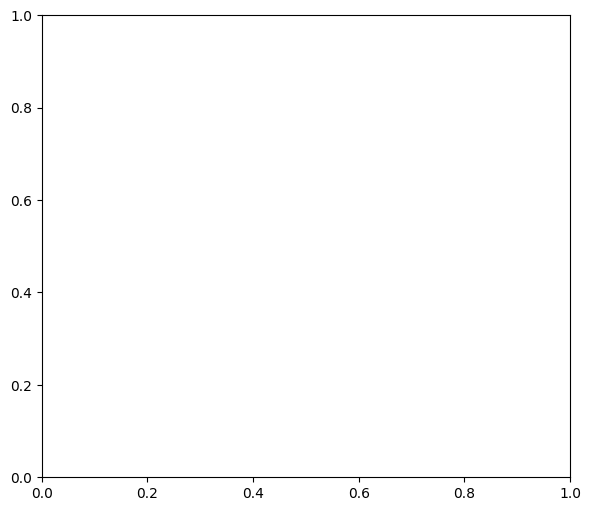

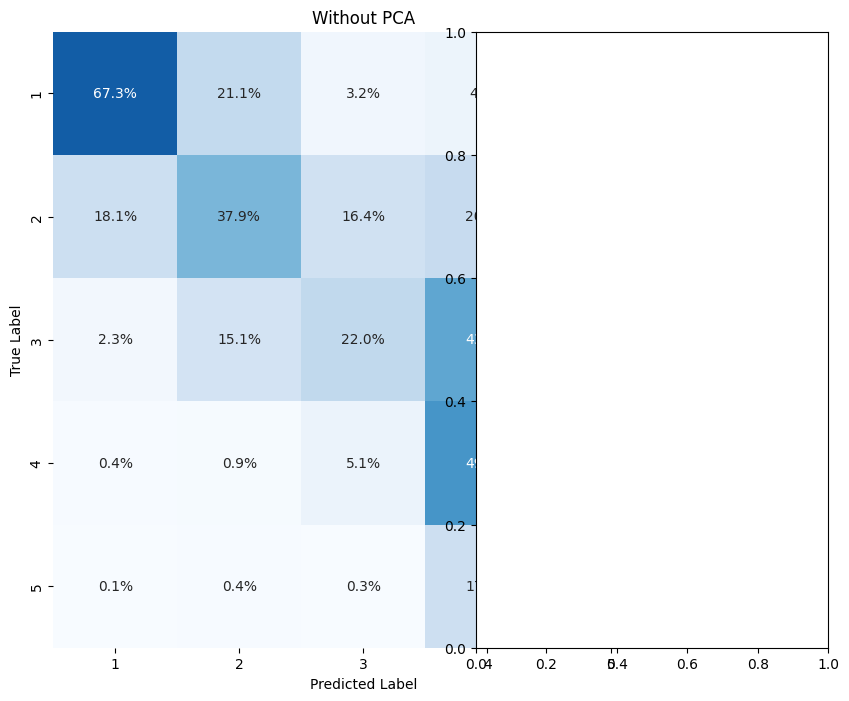

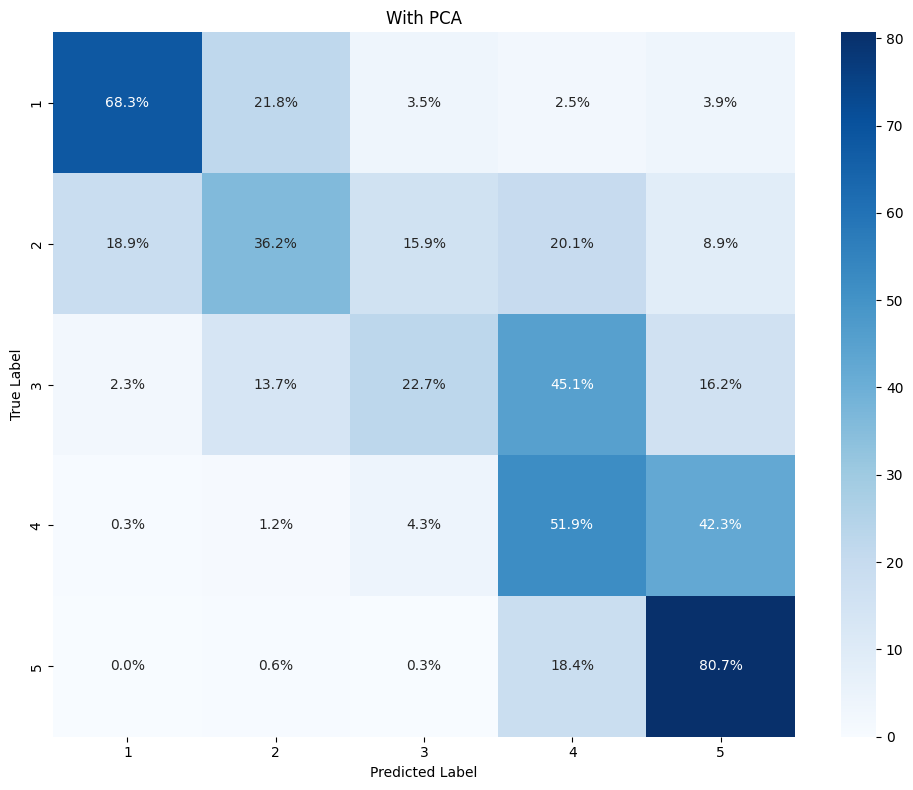

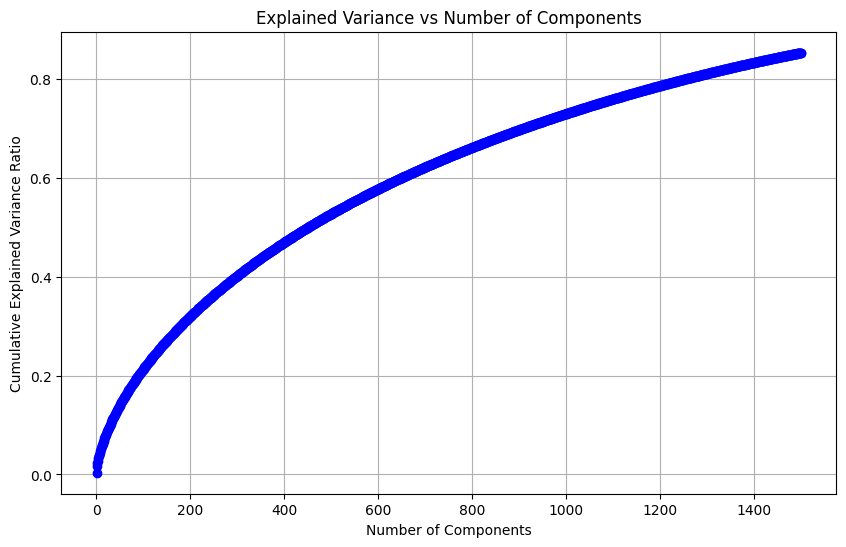

Total variance explained: 0.8534


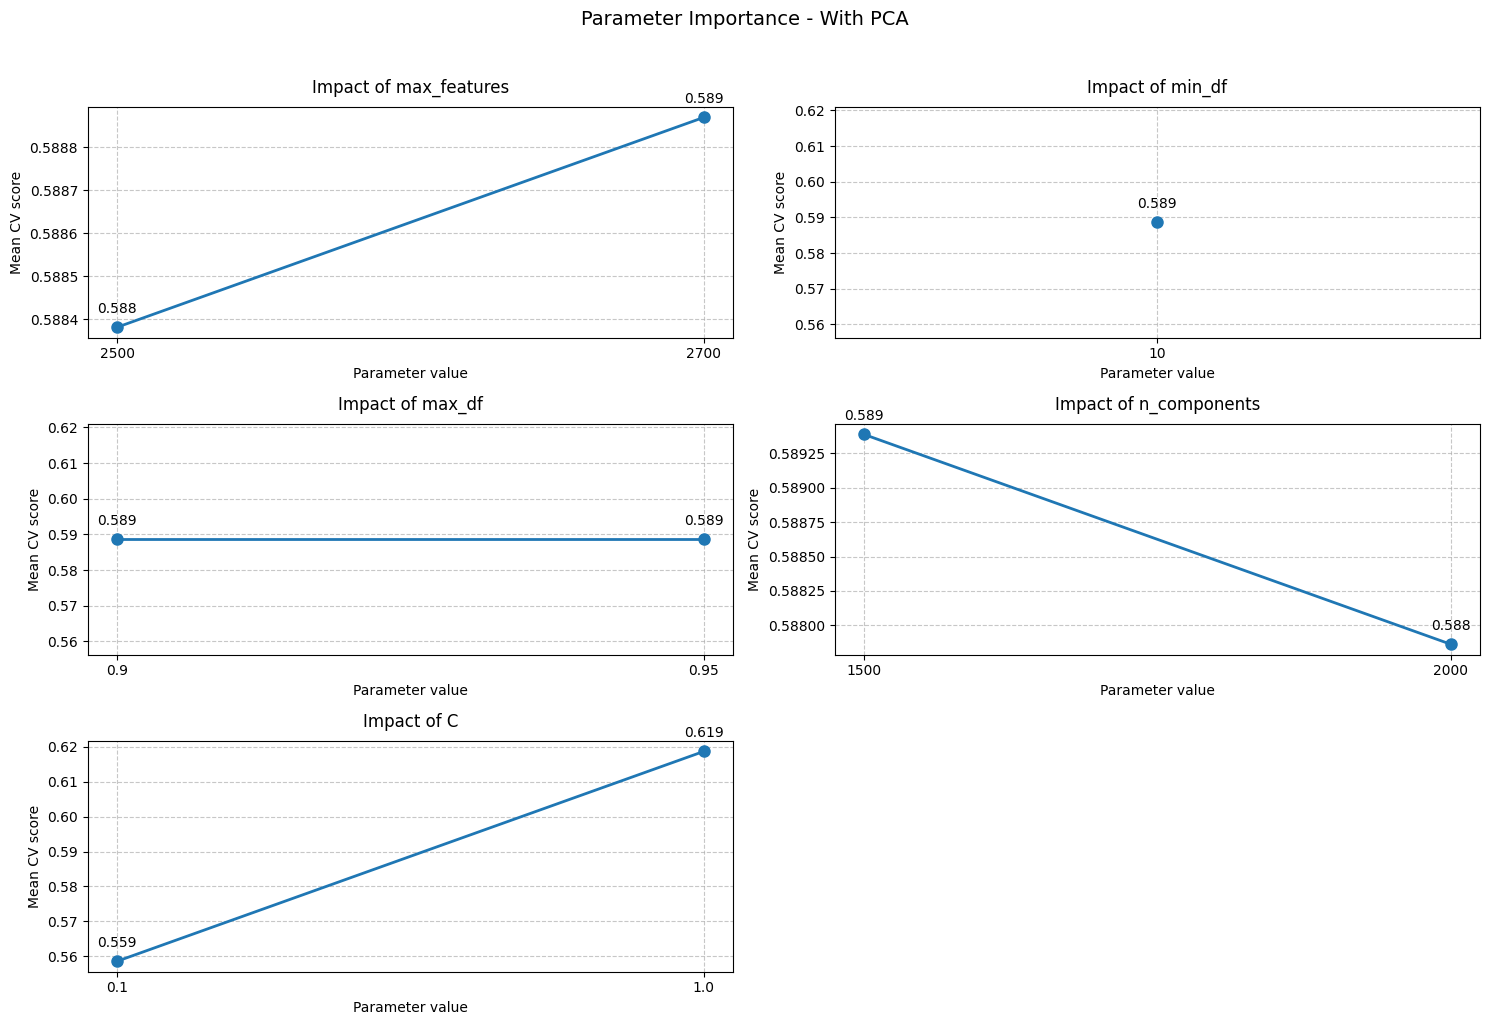

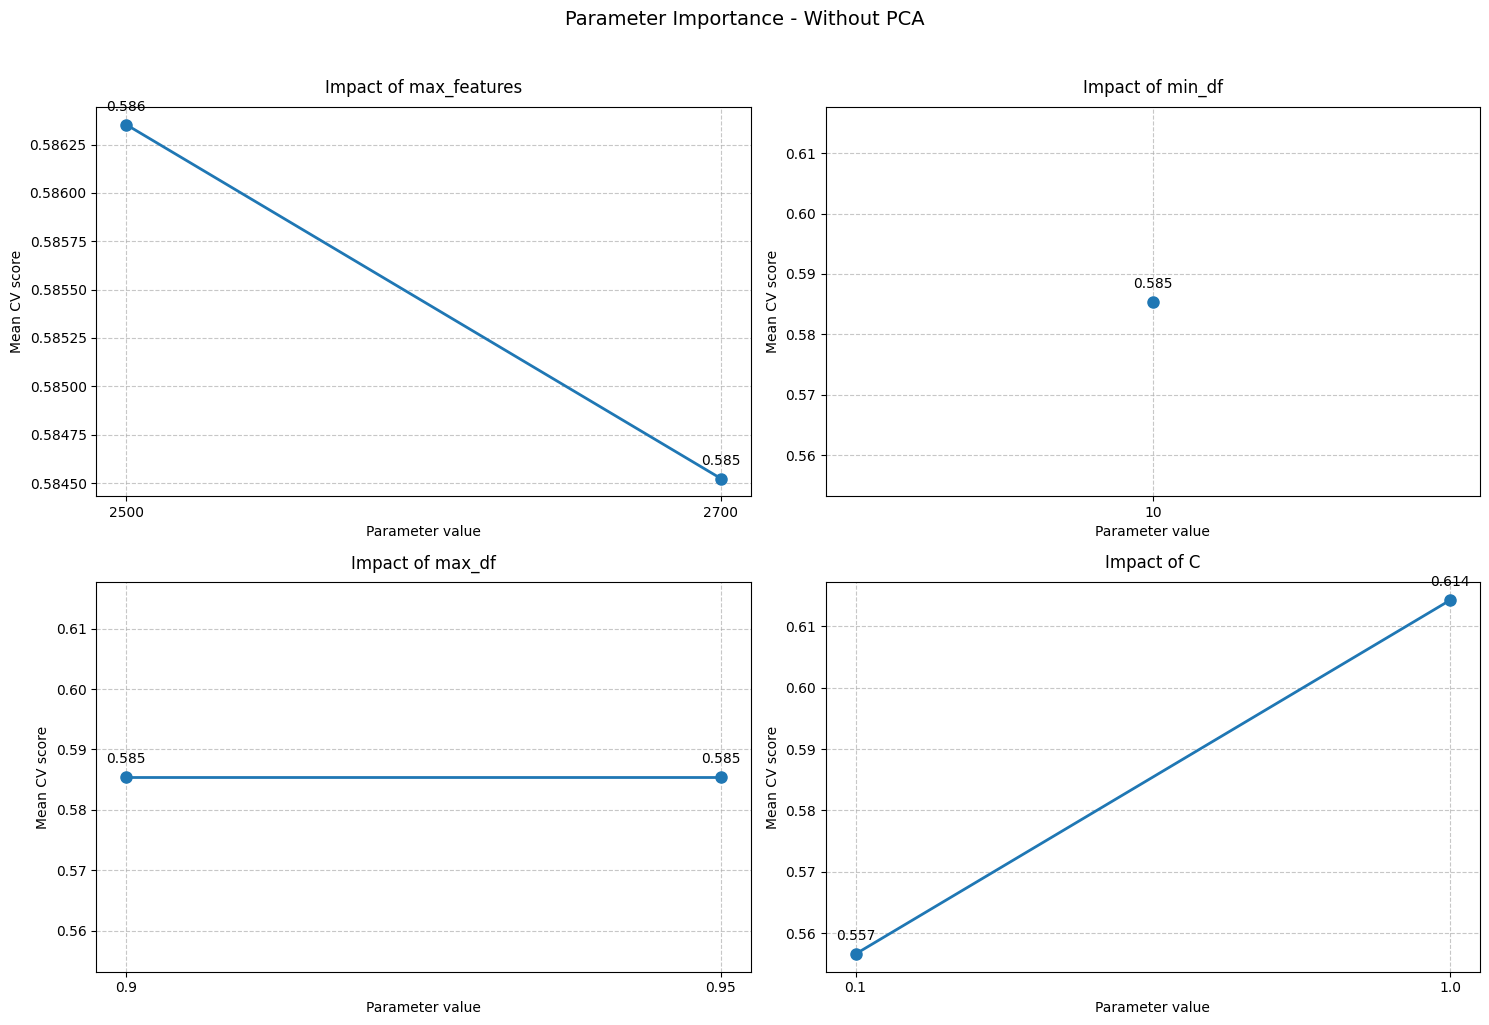

In [73]:
# Usage:
results = compare_models_with_without_pca(X_train, X_test, y_train, y_test)

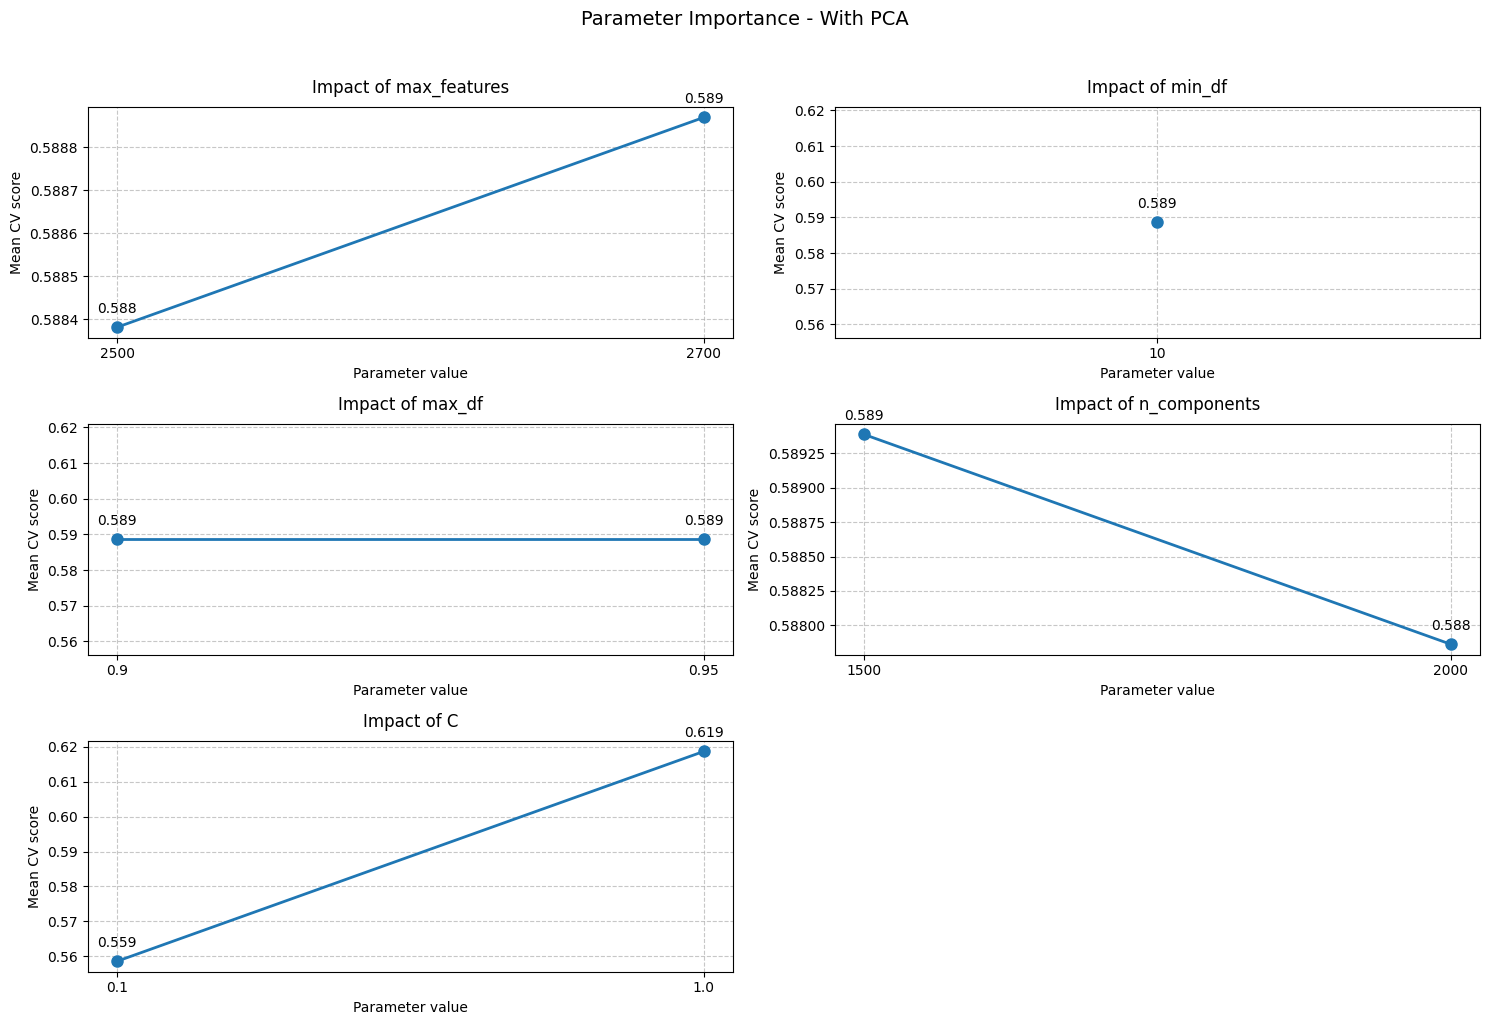

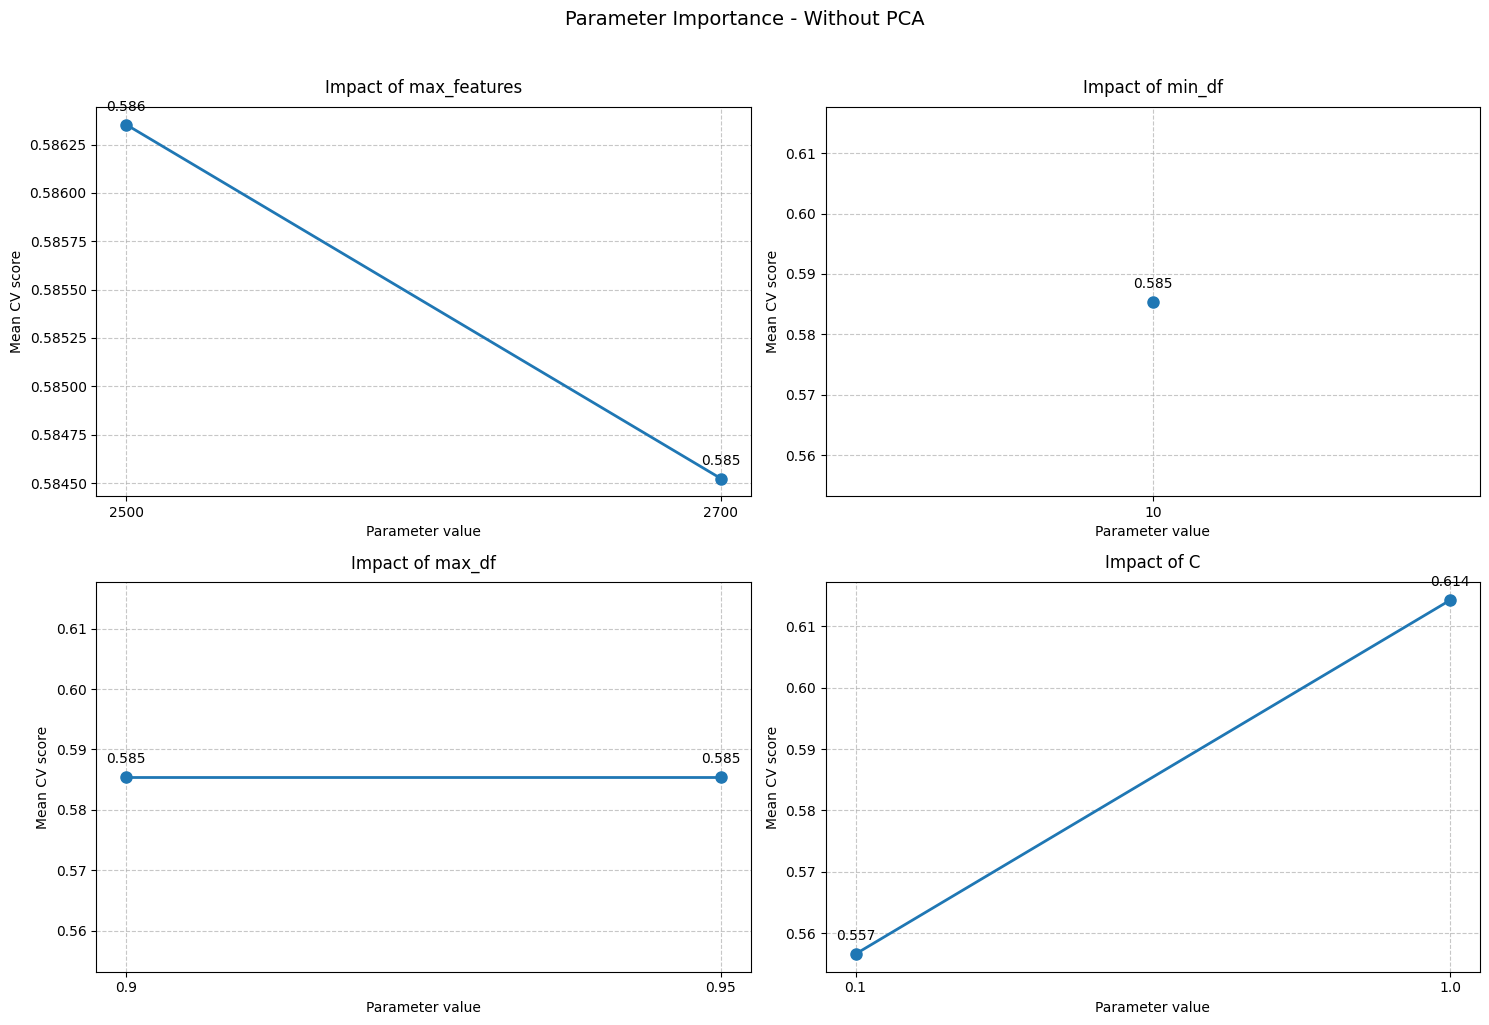

In [74]:
# Now you can use the plot_param_importance function:
plot_param_importance(results['with_pca']['grid'], "Parameter Importance - With PCA")
plot_param_importance(results['without_pca']['grid'], "Parameter Importance - Without PCA")

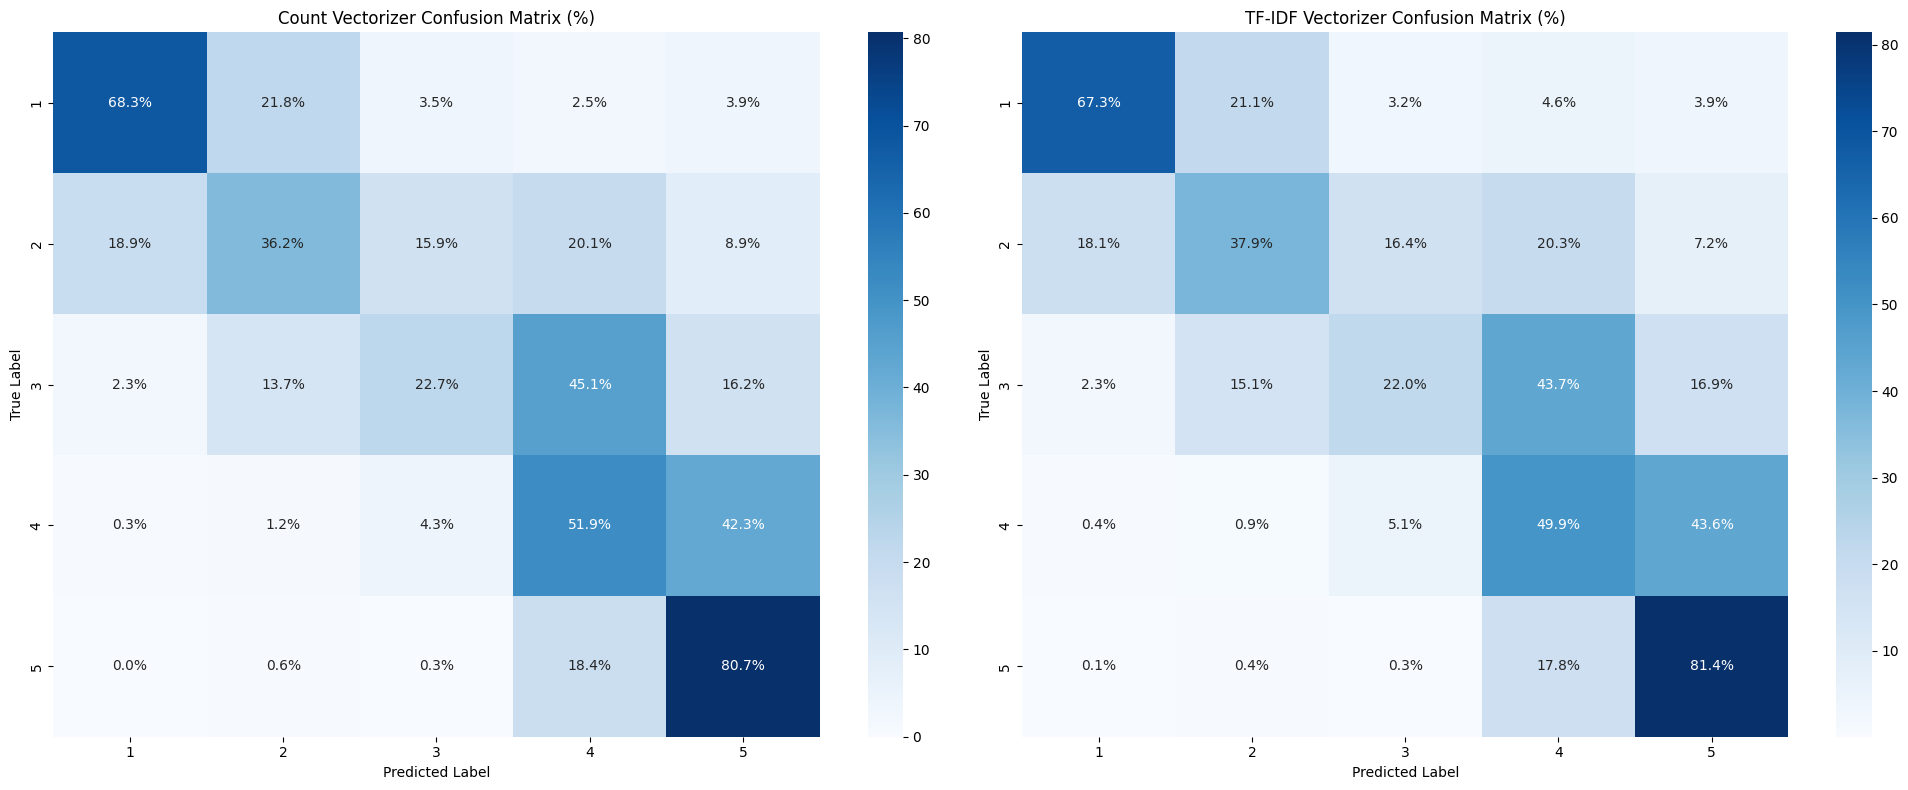


Count Vectorizer Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.68      0.69       284
           2       0.47      0.36      0.41       359
           3       0.44      0.23      0.30       437
           4       0.51      0.52      0.51      1208
           5       0.70      0.81      0.75      1811

    accuracy                           0.61      4099
   macro avg       0.56      0.52      0.53      4099
weighted avg       0.60      0.61      0.60      4099


TF-IDF Vectorizer Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.67      0.69       284
           2       0.49      0.38      0.43       359
           3       0.41      0.22      0.29       437
           4       0.50      0.50      0.50      1208
           5       0.70      0.81      0.75      1811

    accuracy                           0.61      4099
   macro avg       0.56      0.52      0.53     

In [77]:
compare_models(results['with_pca']['model'], results['without_pca']['model'], X_test, y_test)

In [78]:
def analyze_pca_components(model, vectorizer):
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()
    
    # Get PCA components
    pca = model.named_steps['dim_reduction']
    components = pca.components_
    
    # For each component, print top words
    n_top_words = 10
    for i, component in enumerate(components[:5]):  # Look at first 5 components
        top_features_idx = component.argsort()[-n_top_words:][::-1]
        top_features = [(feature_names[j], component[j]) for j in top_features_idx]
        
        print(f"\nTop words for component {i+1}:")
        for word, score in top_features:
            print(f"{word}: {score:.4f}")

# Analyze component interpretation
analyze_pca_components(best_model_with_pca, 
                      best_model_with_pca.named_steps['vectorizer'])

NameError: name 'best_model_with_pca' is not defined

In [ ]:
import time
import psutil
import os

def measure_performance(model, X_train, X_test):
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Measure prediction time
    start_time = time.time()
    model.predict(X_test)
    prediction_time = time.time() - start_time
    
    # Measure memory usage
    process = psutil.Process(os.getpid())
    memory_use = process.memory_info().rss / 1024 / 1024  # in MB
    
    print(f"Training time: {training_time:.2f} seconds")
    print(f"Prediction time: {prediction_time:.2f} seconds")
    print(f"Memory usage: {memory_use:.2f} MB")

# Compare performance
print("Performance without PCA:")
measure_performance(best_model_without_pca, X_train, X_test)

print("\nPerformance with PCA:")
measure_performance(best_model_with_pca, X_train, X_test)